In [22]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [23]:
import re

### Converting text corpus into tokens

In [24]:
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [25]:
tokenize("How*s it go-ing ma%e")

['how', 's', 'it', 'go', 'ing', 'ma', 'e']

In [26]:
tokens = tokenize(text)

In [27]:
tokens

['machine',
 'learning',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'it',
 'is',
 'seen',
 'as',
 'a',
 'subset',
 'of',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build',
 'a',
 'mathematical',
 'model',
 'based',
 'on',
 'sample',
 'data',
 'known',
 'as',
 'training',
 'data',
 'in',
 'order',
 'to',
 'make',
 'predictions',
 'or',
 'decisions',
 'without',
 'being',
 'explicitly',
 'programmed',
 'to',
 'do',
 'so',
 'machine',
 'learning',
 'algorithms',
 'are',
 'used',
 'in',
 'a',
 'wide',
 'variety',
 'of',
 'applications',
 'such',
 'as',
 'email',
 'filtering',
 'and',
 'computer',
 'vision',
 'where',
 'it',
 'is',
 'difficult',
 'or',
 'infeasible',
 'to',
 'develop',
 'conventional',
 'algorithms',
 'to',
 'perform',
 'the',
 'needed',
 'tasks']

In [28]:
len(set(tokens))

60

### Creating a mapping from tokens to indices

In [29]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

In [30]:
word_to_id, id_to_word = mapping(tokens)

In [31]:
word_to_id

{'tasks': 0,
 'automatically': 1,
 'the': 2,
 'build': 3,
 'do': 4,
 'learning': 5,
 'order': 6,
 'being': 7,
 'and': 8,
 'conventional': 9,
 'needed': 10,
 'it': 11,
 'infeasible': 12,
 'wide': 13,
 'variety': 14,
 'to': 15,
 'predictions': 16,
 'as': 17,
 'through': 18,
 'computer': 19,
 'on': 20,
 'data': 21,
 'based': 22,
 'artificial': 23,
 'programmed': 24,
 'a': 25,
 'mathematical': 26,
 'decisions': 27,
 'algorithms': 28,
 'perform': 29,
 'machine': 30,
 'difficult': 31,
 'model': 32,
 'used': 33,
 'explicitly': 34,
 'email': 35,
 'so': 36,
 'improve': 37,
 'known': 38,
 'of': 39,
 'are': 40,
 'without': 41,
 'intelligence': 42,
 'filtering': 43,
 'study': 44,
 'make': 45,
 'is': 46,
 'experience': 47,
 'where': 48,
 'vision': 49,
 'or': 50,
 'such': 51,
 'in': 52,
 'subset': 53,
 'applications': 54,
 'that': 55,
 'sample': 56,
 'training': 57,
 'seen': 58,
 'develop': 59}

### Building the 1HE matrices for inputs and values

In [32]:
import numpy as np

np.random.seed(42)

Function for concatenation

The `yield from` itself starts a inner loop for each of the iterables, and yields the items of that iterable one-by-one. So the complexity here can be simplified to O(mxn) where m is number of iterables and n is # of items in each loop, or further simplified to O(T) where T is the total number of elements when we count all items from all iterables.

Think of the concat function as running a for loop within a for loop to iterate through a list of lists, processing each element within a list exactly one.


In [33]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

Function for 1HE

In [34]:
def one_hot_encode(id,vocab_size):
    res = [0]*vocab_size
    res[id] = 1
    return res

In [35]:
n_tokens = len(tokens)
n_tokens

84

#### What are we doing below?
- We create two sets of 1HE arrays, one array containing the 1HE arrays for index of our inputs in the vocab, and the other array containing the 1HE arrays for indices of our values (aka the tokens within the window of our input).

#### How do we do this? 
- We iterate through all our tokens first

#### Things to keep in mind
- A token's position in the list of tokens is not the same as its position in the vocab list.

In [36]:
def generate_training_data(tokens,word_to_id,window_size):

    X = []
    y = []
    token_len = len(tokens)
    vocab_size = len(word_to_id)
    for index in range(token_len):
        ## Create a list containing i and elements within its window
        window = concat(range(max(0,index-window_size),index),range(index,min(token_len,index+window_size+1)))

        for value_index in window:
            if index==value_index:
                ## we are skipping when i==j because a value can't be its own input
                ## values are items in the window that are before/after the item, but not itself
                continue
            # X are inputs, y are values
            # For first and last token, there's only two values
            # For second and penultimate token, there's 3 values
            # For the rest 80 tokens, there's 4 values, i.e., 2 before them and 2 after
            # These add up to 2*2 + 3*2 + 4*80 which is equal to 330, the shape[0] of X and Y
            # 60 aka the shape[1] of X and y is the size of our vocab
            X.append(one_hot_encode(word_to_id[tokens[index]],vocab_size))
            y.append(one_hot_encode(word_to_id[tokens[value_index]],vocab_size))

    return np.asarray(X),np.asarray(y)


In [37]:
X, y = generate_training_data(tokens,word_to_id,2)

### The Embedding Model

What's happening in this neural network and its two layers?

- We feed the 1HE matrix of our sentence with each row being the word's 1HE representation.

**First layer**: Multiplying with this weight matrix is what produces our embedding matrix.
- This is then matmul'd with a weight matrix which converts this sparse 1HE matrix into a dense embedding matrix, where each row is that token's embedding vector.
- Essentially, this first weight matrix is an embedding look-up table, where each row is a token's enbedding vector and the # of columns is the dimension of the embedding space.

**Second layer**: Why do we multiply with a second weight matrix?
- This multiplication is to convert our embedding matrix into a matrix which contains the logits for its relation to other tokens in our embedding space. Let's call this output matrix B.
- When we then apply softmax on top on this output B, that's when we get our final output matrix, where each row contains the probabilities for different tokens, with each probability indicating how related that token is to our input token (aka how contextually related is this to our input token).

##### Initializing the network

In [38]:
def init_network(vocab_size,n_embedding):

    model = {
        'w1': np.random.randn(vocab_size,n_embedding),
        # Why is shape of w2 this? because the output needs to have vocab_size columns, where each column
        #indicates the probability indicates how much that token is contextually related to our input token.
        'w2': np.random.randn(n_embedding,vocab_size)
    }

    return model

In [39]:
model = init_network(len(word_to_id),10)

### Forward propogation

We've built the softmax the way it is below, because X will be a matrix containing the vectors (aka logits), and since we want to operate softmax on multi-dimensional vectors specifically, we apply softmax on the vectors, not the matrix containing the vectors (logits).

Softmax converts logits into probabilities, which is what we want.

In [40]:
def softmax(X):
    result = []
    for x in X:
        exp = np.exp(x)
        result.append(exp/exp.sum())
    return result

**What is the above softmax function doing?**

If X is a matrix of multi-dim vectors and an x in it is that multi-dim vector, say [[3,4,5]], then when we apply `np.exp(x)`, it calculates $e^x$ values for each x in the vector. 
Then when we apply `exp.sum()` it calculates the sum of all these exponentials.
Hence, when we apply exp/exp.sum(), it gives us 
**$e^i/\sum_{n=1}^{N} e^i$**, which is the formula for softmax.

In [51]:
def forward(model, X, return_cache=True):
    cache = {}

    cache['a1'] = X @ model['w1']
    cache['a2'] = cache['a1'] @ model['w2']
    cache['z'] = softmax(cache['a2'])

    if not return_cache:
        ## This is during inference where we only care about the context probabilities
        return cache['z']
    
    ## This is during training where we need all the intermediate activation values to later perform backprop
    return cache

In [53]:
(X@model['w1']).shape, ((X@model['w1'])@model['w2']).shape

((330, 10), (330, 60))

### Backprop

$$A1=XW_1$$

$$A_2=A_1W_2 $$

$$Z=σ(A_2)$$ 
<p align='center'>where σ refers to the softmax function.</p>

<p align='center'>The loss function w.r.t the activations A2 is given by </p>


$$ \frac{\partial L}{\partial A_2} = Z - y $$


In [52]:
def cross_entropy(z,y):
    # Here y is our actual target value and z is the predicted probability value for our target
    return -np.sum(y * np.log(z))

In the context of backrpopogation, he **loss** is implicitly involved in calculating these gradients but doesn't need to be explicitly calculated as a standalone value for the purpose of updating the weights.

The main reason we calculate loss is for monitoring how our model training is progressing (or regressing).

In [54]:
def backward(model, X, y, alpha):
    cache = forward(model, X)

    ## For all the below variables where it says dX, it just means it is the differential of loss(L) wrt X.
    ## i.e., it is shorthand for dL/dX

    ## And as we know, the caches are basically the values calculated for activations during forward prop

    ## I just proved to myself all the below differentials. They're very easy to do using chain rule - try it out!
    da2 = cache['z'] - y
    dw2 = cache['a1'].T @ da2
    da1 = da2@model['w2'].T
    dw1 = X.T @ da1

    assert(dw2.shape == model['w2'].shape)
    assert(dw1.shape == model['w1'].shape)

    model['w1'] -= alpha*dw1
    model['w2'] -= alpha*dw2

    return cross_entropy(cache['z'],y)

/var/folders/yk/w45pp5lj3s91zzwz55_2kqkm0000gn/T/ipykernel_26749/3326201517.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


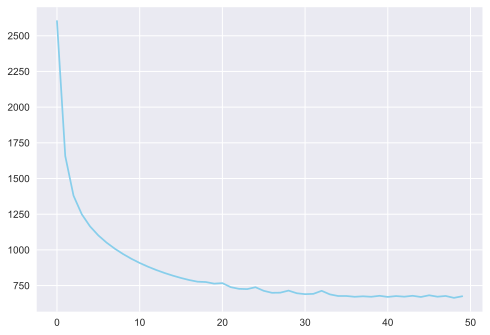

In [28]:
import matplotlib.pyplot as plt

n_iter = 50
learning_rate = 0.05
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

### Empirically testing how well it works

In [34]:
learning = one_hot_encode(word_to_id['machine'], len(word_to_id))


In [35]:
len(learning)

60

In [36]:
result = forward(model, [learning], return_cache=False)[0]

In [37]:
result

array([2.57868972e-03, 1.27552800e-03, 9.29229383e-07, 2.69099629e-04,
       5.61487694e-05, 1.57197404e-03, 1.06336723e-03, 6.79025882e-04,
       1.37676993e-04, 7.62427156e-02, 7.43875115e-08, 1.70824788e-04,
       7.21863987e-04, 8.50335779e-04, 5.19431744e-06, 1.64724488e-04,
       2.32472251e-02, 4.78055744e-05, 3.03254524e-07, 2.28893071e-06,
       1.67472799e-03, 4.05573932e-04, 3.38607622e-04, 8.15572754e-04,
       2.24766972e-04, 3.09637837e-04, 9.51846715e-06, 1.14723622e-03,
       4.87207856e-04, 6.85376393e-07, 1.24729980e-04, 3.67904700e-01,
       3.89433689e-01, 9.34191679e-07, 2.75927109e-02, 2.63795068e-07,
       3.56376712e-05, 4.53774001e-02, 4.19693834e-04, 2.17157334e-06,
       2.62591102e-04, 1.99263192e-04, 4.19128046e-05, 2.74255928e-04,
       2.63482823e-05, 4.93554666e-05, 2.18642872e-02, 4.03270716e-05,
       1.48851464e-04, 2.03620557e-05, 6.61660220e-06, 2.94409642e-02,
       5.08572772e-07, 2.43759018e-06, 5.66589598e-04, 1.16517682e-03,
      

In [38]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

In [39]:
for index,word in enumerate((id_to_word[id] for id in np.argsort(result)[::-1])):
    print(f"{index} closest is {word}")

0 closest is learning
1 closest is algorithms
2 closest is artificial
3 closest is do
4 closest is is
5 closest is so
6 closest is to
7 closest is intelligence
8 closest is machine
9 closest is used
10 closest is infeasible
11 closest is computer
12 closest is conventional
13 closest is the
14 closest is of
15 closest is being
16 closest is subset
17 closest is as
18 closest is and
19 closest is predictions
20 closest is tasks
21 closest is make
22 closest is build
23 closest is study
24 closest is perform
25 closest is explicitly
26 closest is without
27 closest is filtering
28 closest is vision
29 closest is order
30 closest is develop
31 closest is difficult
32 closest is variety
33 closest is seen
34 closest is where
35 closest is are
36 closest is wide
37 closest is email
38 closest is in
39 closest is such
40 closest is automatically
41 closest is applications
42 closest is that
43 closest is mathematical
44 closest is through
45 closest is decisions
46 closest is model
47 closes

In [40]:
model['w1']

array([[ 7.22282817e-01, -5.36043478e-01, -1.75051356e+00,
         8.46215410e-01, -1.15719347e+00,  9.39692730e-01,
         9.50404975e-01, -4.75466933e-01, -5.39593711e-01,
        -1.11465964e+00],
       [ 3.61381098e-01, -3.84275073e-01, -1.05460733e+00,
        -2.40563689e+00, -1.97408973e+00,  4.05118962e-01,
        -1.21907488e-02,  1.68787023e+00, -1.02087839e+00,
        -9.88432133e-01],
       [-5.06258743e-01,  3.90917645e-01,  7.85735641e-01,
        -2.04384929e+00,  7.73863866e-01, -1.48260801e+00,
        -1.43801298e-01,  1.30190877e+00,  8.24752771e-01,
        -7.63187585e-01],
       [-6.28499989e-01,  2.18281708e+00, -8.08091662e-01,
        -1.61487327e+00,  9.85772160e-02,  1.21552773e-01,
         2.13717651e+00, -1.32549533e+00, -9.18259761e-01,
        -4.13627769e-01],
       [ 5.94929711e-01, -4.96253425e-01,  1.39242486e+00,
         4.40682293e-01, -1.59958313e+00, -5.49698962e-01,
         1.38471963e+00,  1.28409968e+00,  1.23833658e+00,
        -1.

In [43]:
model['w1'].shape, len(word_to_id)

((60, 10), 60)

In [44]:
def get_word_embedding(model,word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print(f"{word} not in corpus")
    word_onehot = one_hot_encode(idx, len(word_to_id))

    # The below makes sense because cache['a1'] = X @ model['w1'], and that means that
    # when we feed in our word which is X and it is mat-mul'd with model['w1], we 
    # get cache['a1'] which gives the embedding matrix (or vector if we're feeding only one word.)
    return forward(model,word_onehot)['a1']

In [45]:
get_word_embedding(model,'machine')

array([ 0.72228282, -0.53604348, -1.75051356,  0.84621541, -1.15719347,
        0.93969273,  0.95040497, -0.47546693, -0.53959371, -1.11465964])

**Alright, why does this actually work?**

We created 2 weight matrices and updated them during training, each of which serve a specific purpose

The first weight matrix helps convert our sparse 1HE matrix containing 1HE vectors for tokens, into a dense embedding matrix where each row is the embedding vector for a token.

How did that come to be though?

As we backpropogate the error from the second weight matrix back to the first weight matrix, what we are doing is trying to nudge this matrix in a direction that will better help us predict context in the second weight matrix. And because the other piece is literally that we are using this first weight matrix as a mapping of a sparse input token matrix into a dense matrix, a better first weight matrix just means that this improvement leads to it doing a better job at embedding these sparse vectors as well.

 Essentially, the embeddings are adjusted to group together words that predict similar contexts, which is why they capture semantic meaning.